In [7]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
X_train, Y_train = make_blobs(n_samples=1000, centers=8, n_features=2, cluster_std=1.3, random_state=4)

KeyError: 2

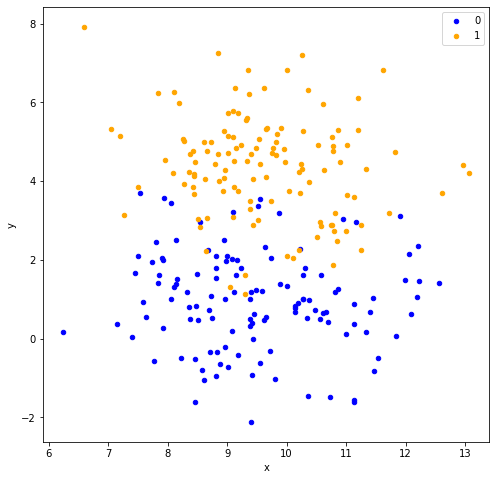

In [10]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame 

df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [11]:
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0])

    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1])
    
    return X

In [12]:
X = normalize(X_train)
print(X[0:5])


[[0.65546284 0.30872376]
 [0.75734778 0.80978431]
 [0.79698457 0.10198733]
 [0.79106344 0.1061503 ]
 [0.81369664 0.13191636]]


In [13]:
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)):
        dist = np.sqrt(sum(np.square(X_tr[i]-new_point)))
        neighbor_arr.append([i, dist])
    neighbor_arr = sorted(neighbor_arr, key = lambda x : x[1])
    
    return neighbor_arr[0:k]

In [14]:
from collections import Counter
def classifier(neighbor_arr):
    class_arr = [Y_train[i[0]] for i in neighbor_arr]
    return Counter(class_arr).most_common(1)[0][0]

In [15]:
new_points = np.array([[-10, -10],
                      [0, 10],
                      [-15, 10],
                      [5, -2]])

new_points = normalize(new_points)

In [16]:
knn = find_neighbors(4, X, new_points[1])
classifier(knn)

6

In [18]:
from sklearn.datasets import make_regression
X_train, Y_train = make_regression(n_samples=1000, n_features=2, n_informative=2, noise=5, bias=30, random_state=200)

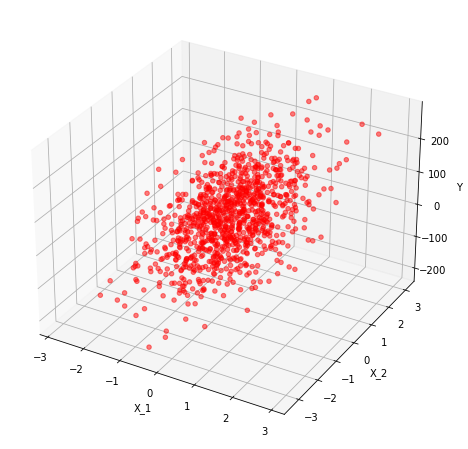

In [19]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],Y_train, c = "red",alpha=.5, marker = 'o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

In [20]:
def regressor(neighbor_arr):
    y_arr = [Y_train[i[0]] for i in neighbor_arr]
    avg_y = np.mean(y_arr)
    return avg_y

In [21]:
new_points = np.array([[-1, 1],
                      [0, 2],
                      [-3, -2],
                      [3, -3]])

knn = find_neighbors(3, X_train, new_points[1])
regressor(knn)

157.98331740281003